In [1]:
import os
import glob
import numpy as np
from PIL import Image
import tensorflow as tf

from datasets.div2k.parameters import Div2kParameters 
from models.srresnet import build_srresnet
from utils.config import config

In [2]:
dataset_key = "bicubic_x4"

data_path = config.get("data_path", "") 

div2k_folder = os.path.abspath(os.path.join(data_path, "div2k"))

dataset_parameters = Div2kParameters(dataset_key, save_data_directory=div2k_folder)

In [37]:
def load_image(path):
    return np.array(Image.open(path))


In [38]:
model_name = "srresnet"
# model_name = "srgan"

In [39]:
model_key = f"{model_name}_{dataset_key}"

In [40]:
model = build_srresnet(scale=dataset_parameters.scale)

weights_directory = f"weights/{model_key}"

os.makedirs(weights_directory, exist_ok=True)
weights_file = f'{weights_directory}/generator.h5'

model.load_weights(weights_file)

In [41]:
image_paths = glob.glob("examples/input_images/*")

In [42]:
results_path = f"examples/{model_key}/"

In [43]:
os.makedirs(results_path, exist_ok=True)

In [44]:
for image_path in image_paths:
    print(image_path)
    lr = load_image(image_path)

    sr = model.predict(tf.expand_dims(lr, axis=0))[0]
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    sr = Image.fromarray(sr.numpy())
    
    image_name = image_path.split("/")[-1]
    sr.save(f"{results_path}{image_name}" )

examples/input_images/000004x4.png
examples/input_images/187_0019.jpg
examples/input_images/000002x4.png
examples/input_images/000003x4.png


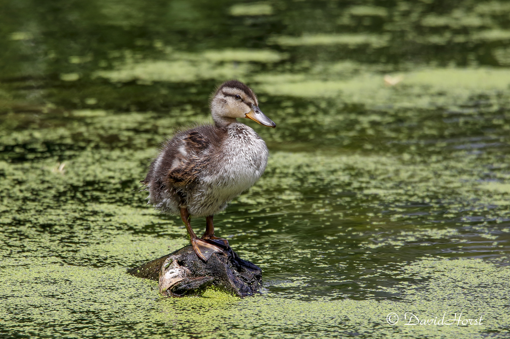

In [45]:
Image.fromarray(lr)

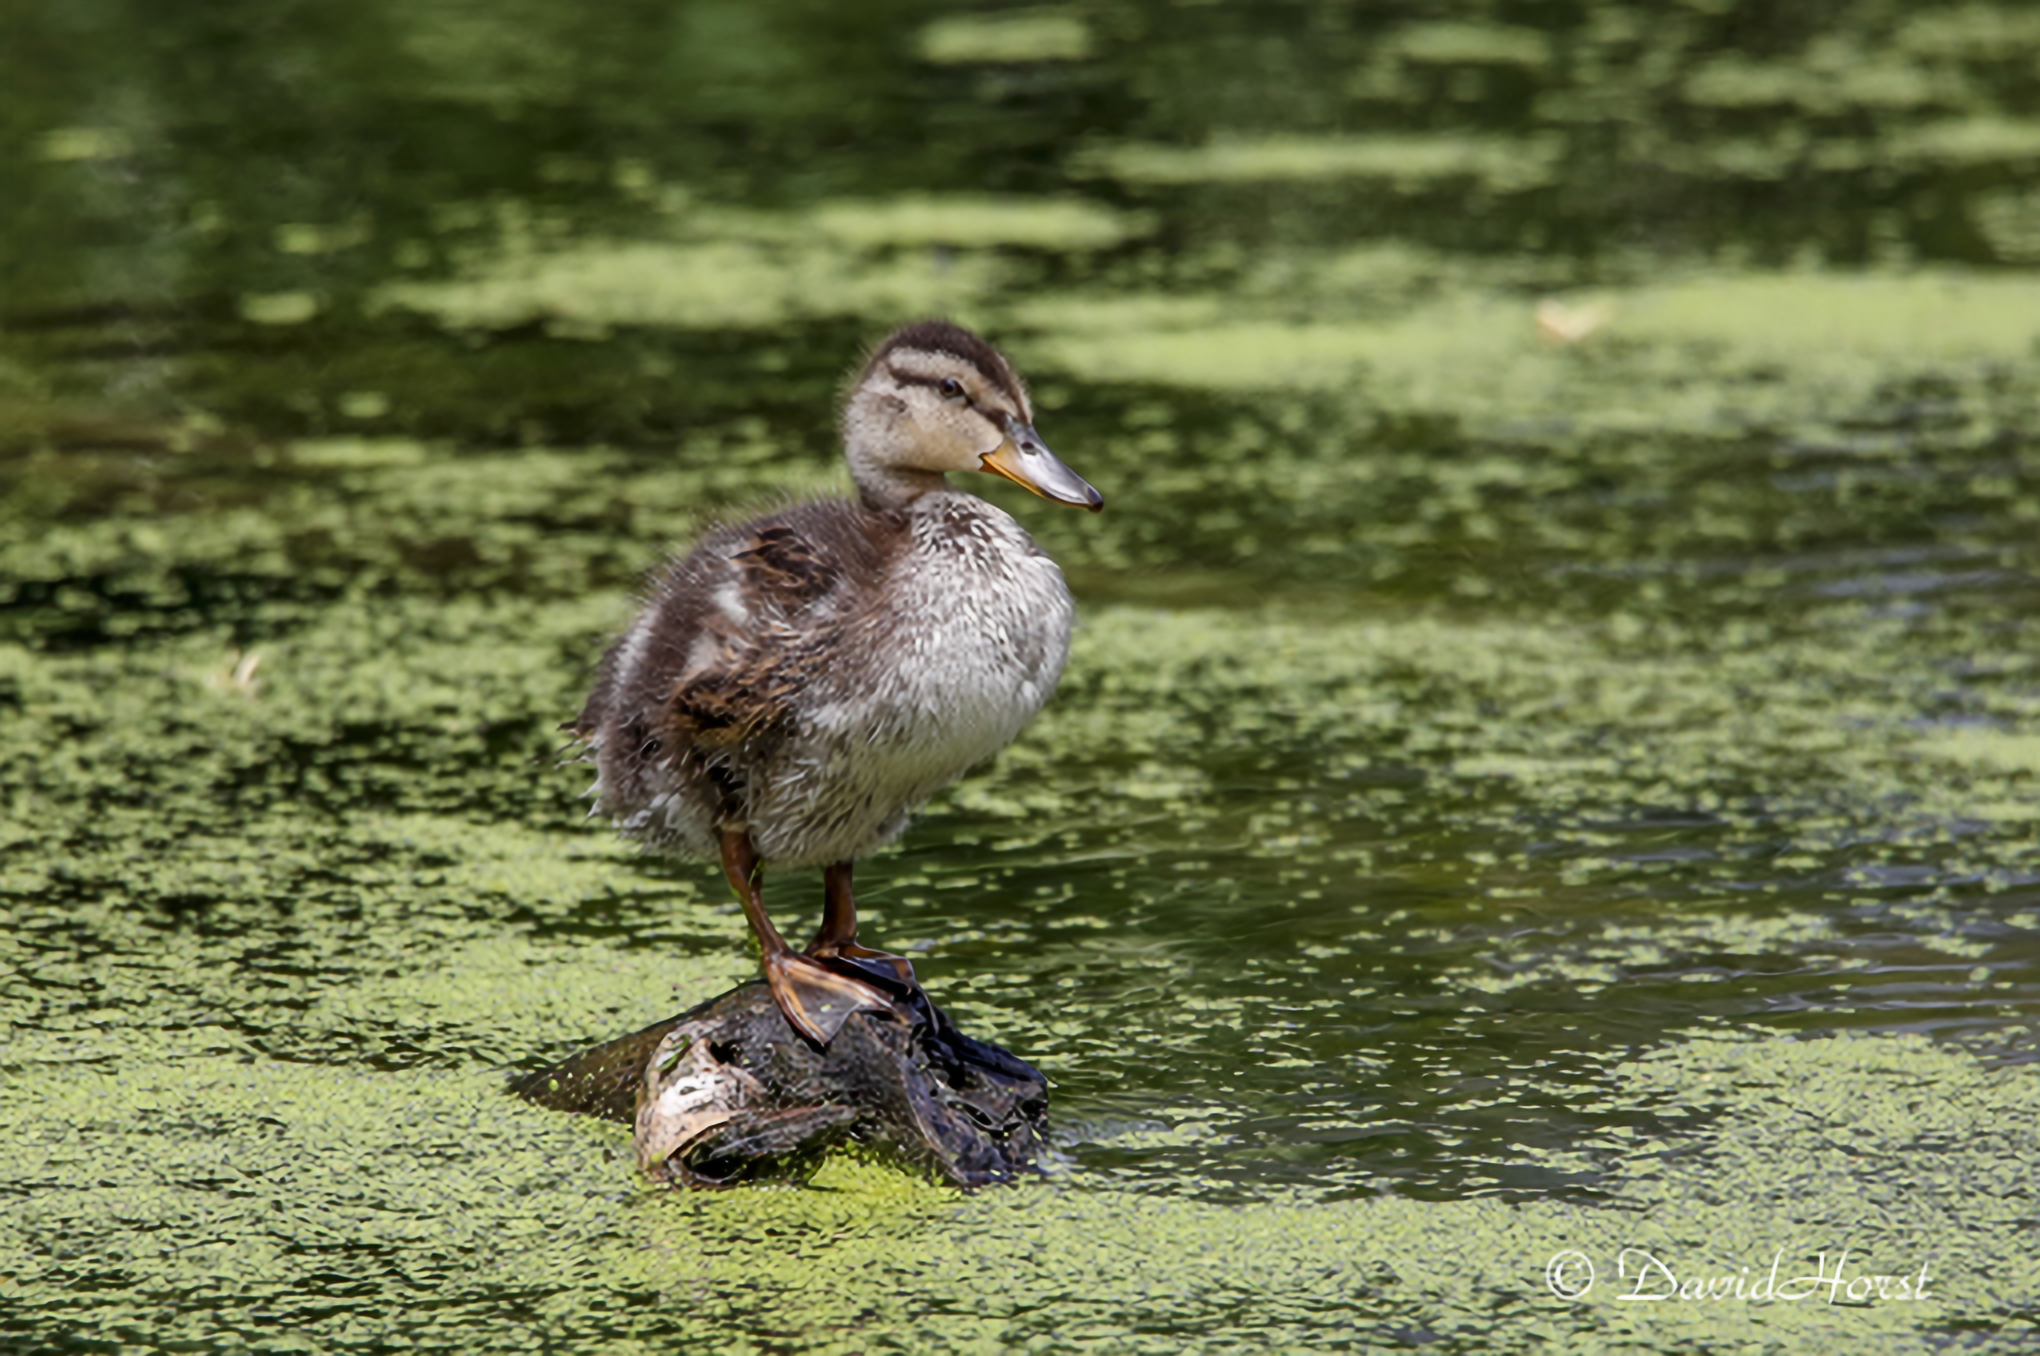

In [46]:
sr

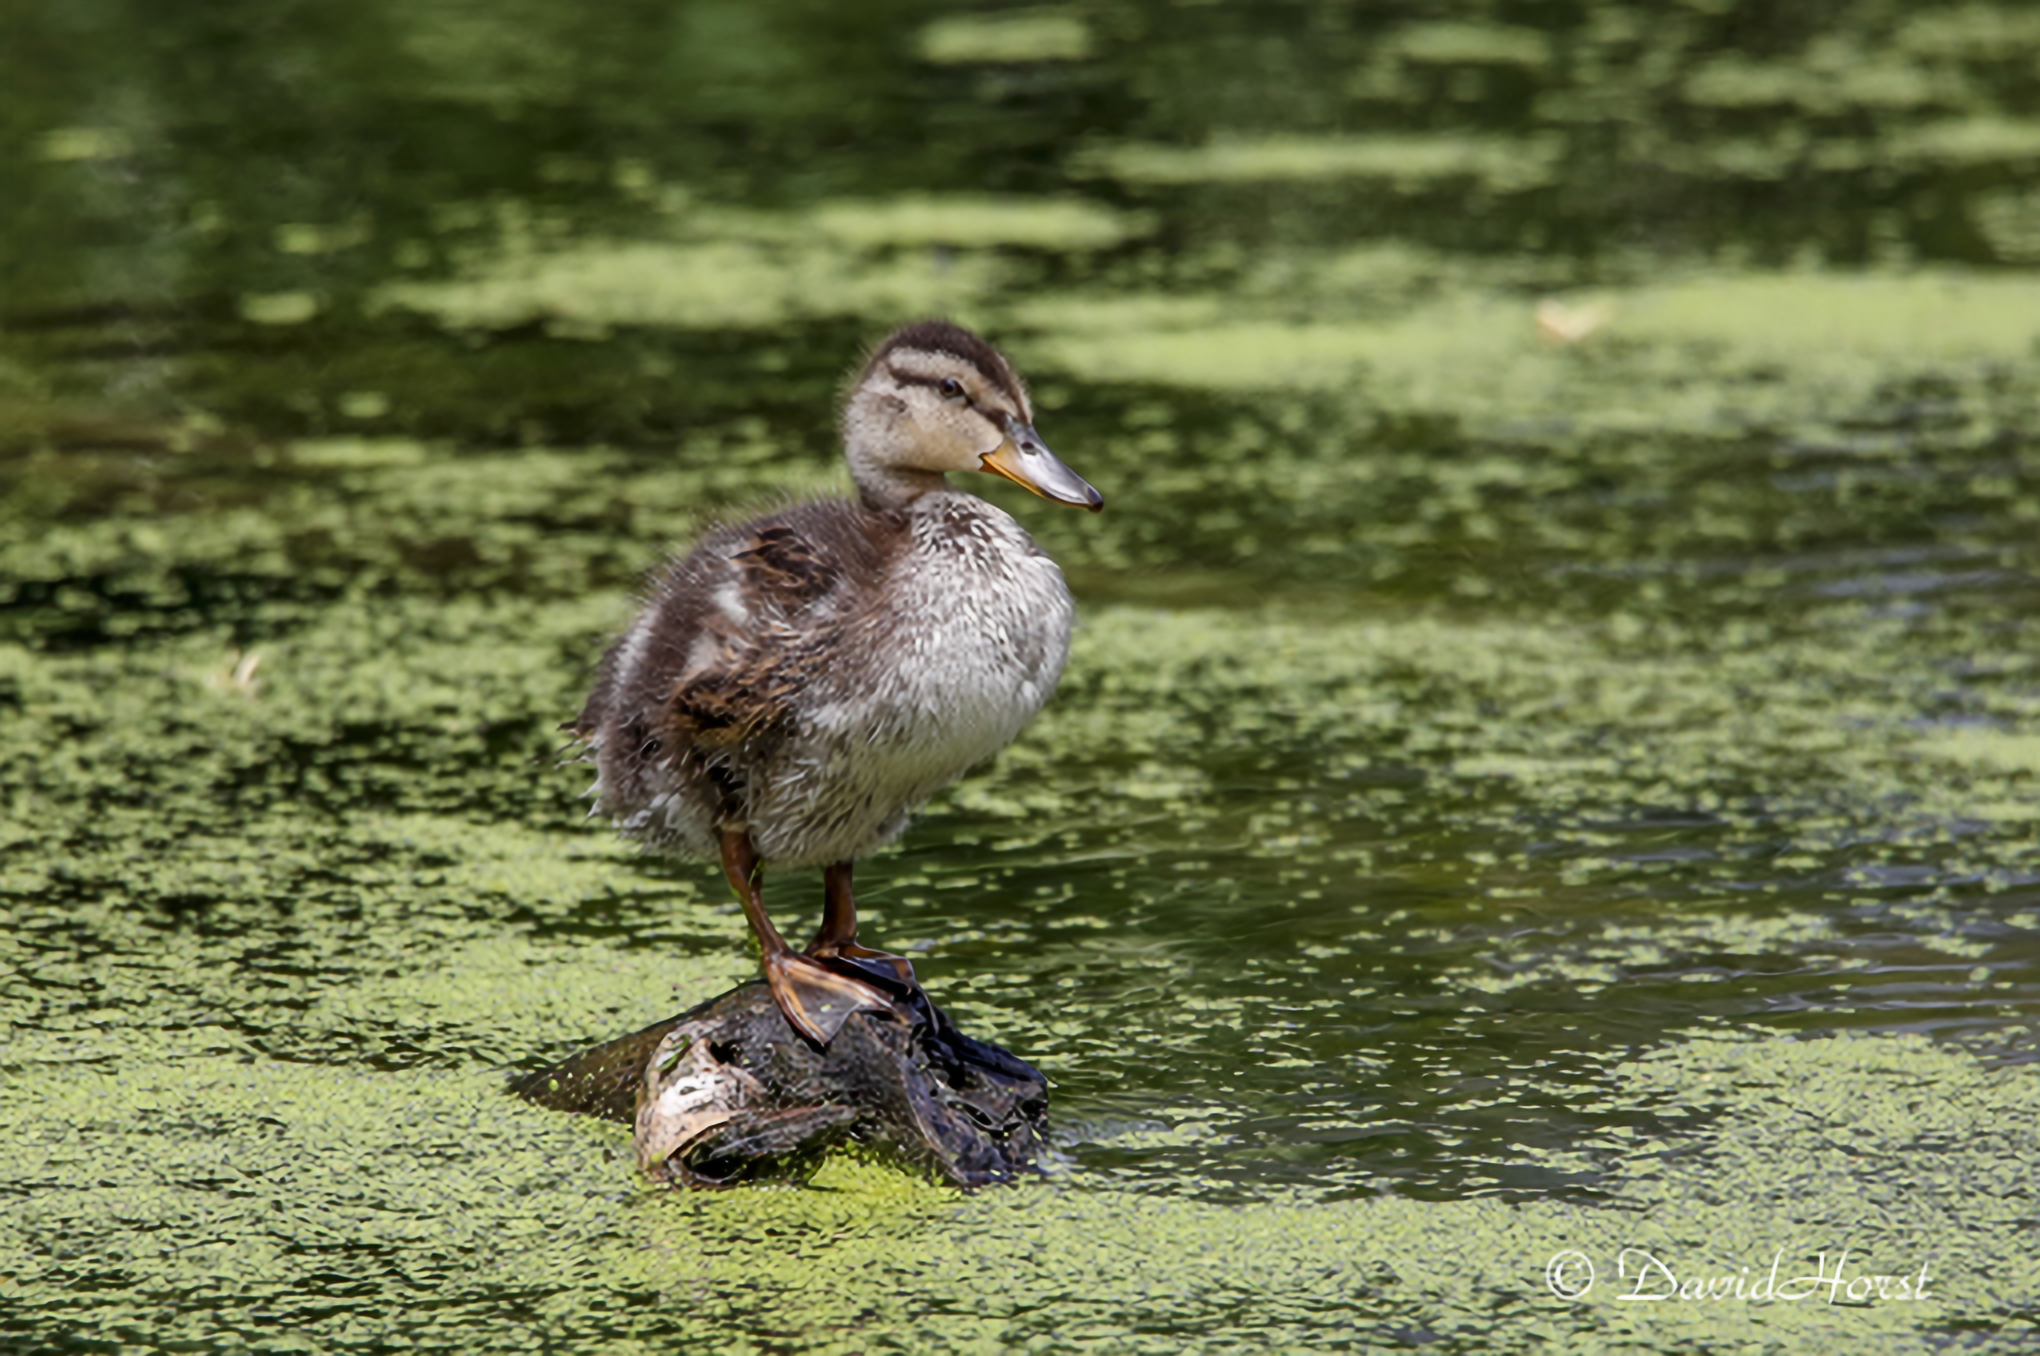

In [47]:
sr